3.-Divide aleatoriamente el conjunto de datos de cáncer de seno de Wisconsin3

en un subconjunto de
entrenamiento con el 60 % de los datos, un subconjunto de validación con el 20 % y un subconjunto
de prueba con el 20 % restante usando 0 como semilla para tu generador de números aleatorios.
Este conjunto de datos contiene 699 registros de tumores de seno, de los cuales 458 son benignos y
241 son malignos.

In [2]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC



In [3]:

# URL del archivo de datos
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

# Cargar los datos en un DataFrame
df = pd.read_csv(url, header=None)  # No tiene encabezados, por eso usamos header=None


In [4]:
# Definir nombres de columnas en español
column_names = [
    "ID_Muestra", "Grosor_Tumor", "Uniformidad_Tamaño_Celular", 
    "Uniformidad_Forma_Celular", "Adhesión_Marginal", "Tamaño_Célula_Epitelial", 
    "Núcleos_Desnudos", "Cromatina_Blanda", "Nucléolos_Normales", 
    "Mitosis_Celular", "Clase"
]

# Asignar los nombres de columna
df.columns = column_names

In [5]:
# corroboramos el tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID_Muestra                  699 non-null    int64 
 1   Grosor_Tumor                699 non-null    int64 
 2   Uniformidad_Tamaño_Celular  699 non-null    int64 
 3   Uniformidad_Forma_Celular   699 non-null    int64 
 4   Adhesión_Marginal           699 non-null    int64 
 5   Tamaño_Célula_Epitelial     699 non-null    int64 
 6   Núcleos_Desnudos            699 non-null    object
 7   Cromatina_Blanda            699 non-null    int64 
 8   Nucléolos_Normales          699 non-null    int64 
 9   Mitosis_Celular             699 non-null    int64 
 10  Clase                       699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [6]:
#La columna tiene un tipo de dato objecto, veremos que valores extra a numeros tiene.
columna = "Núcleos_Desnudos"
valores_no_numericos = df[pd.to_numeric(df[columna], errors="coerce").isna()]
print(valores_no_numericos[columna])

23     ?
40     ?
139    ?
145    ?
158    ?
164    ?
235    ?
249    ?
275    ?
292    ?
294    ?
297    ?
315    ?
321    ?
411    ?
617    ?
Name: Núcleos_Desnudos, dtype: object


In [7]:
#Encontramos 16 valores "?" en la columna "Núcleos_Desnudos" por lo que prcedemos a remplazarlos por 
#NANs y poder trabajar regularmente con ellos 
df.replace("?", pd.NA, inplace=True)

#Convertimos la columna a tipo entero
df["Núcleos_Desnudos"] = pd.to_numeric(df["Núcleos_Desnudos"]).astype("Int64")




In [8]:
#Validamos los 16 nans
print(df.isna().sum().sum())

16


In [9]:
#Validamos si el volumen de los datos coincide con la información proporcionada
pivot_table = df.pivot_table(values="ID_Muestra", index="Clase", aggfunc="count")
pivot_table.loc["Total"] = pivot_table.sum()
pivot_table["Porcentaje"] = (pivot_table["ID_Muestra"] / pivot_table.loc["Total", "ID_Muestra"]) * 100
pivot_table

,ID_Muestra,Porcentaje
Clase,,
2,458,65.522175
4,241,34.477825
Total,699,100.000000


In [ ]:
#quitaremosw el ID de la muestra ya que no aporta información relevante
df.drop(columns="ID_Muestra", inplace=True)


Procedemos a generar nuestros subsets 

In [30]:

X = df.drop(columns=['Clase'])  
y = df['Clase']  

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)


Usaremos 3 metodologias para el tratamiento de los datos faltantes

1. Eliminar las filas con datos faltantes
2. Imputar los datos faltantes con la media
3. Interpolación lineal para los datos faltantes

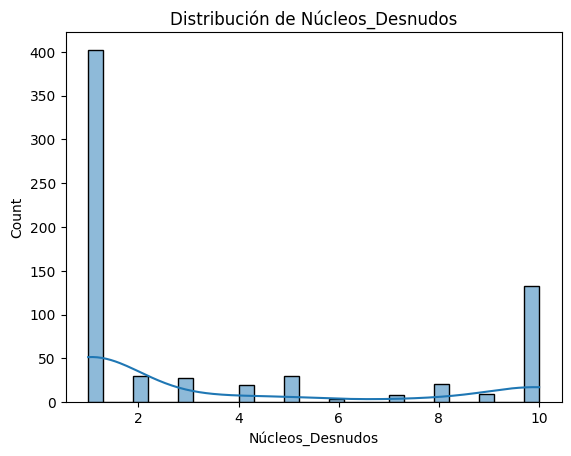

In [11]:

#Visualizamos la distribución de la columna "Núcleos_Desnudos"

sns.histplot(df["Núcleos_Desnudos"], kde=True, bins=30)
plt.title(f'Distribución de {columna}')
plt.show()


In [ ]:
#1 eliminar las filas con valores nulos 

df_drop = df_1.dropna()

#2 reemplazar los valores nulos con la media de la columna
df_avg = df_2
df_avg["Núcleos_Desnudos"] = df_avg["Núcleos_Desnudos"].fillna(round(df_avg["Núcleos_Desnudos"].mean(),0)).astype("int64")

#3 adado que no encontramos una distribucón haremos una interpolación lineal
df_mode = df_3
df_mode["Núcleos_Desnudos"] = df_mode["Núcleos_Desnudos"].fillna(1).astype("int64")


In [16]:
#Regresión Logística
#Support Vector Machines (SVM)
#Random Forest
#Naive Bayes

In [ ]:
#LOGISTICA sin registros nulos

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo de regresión logística
model_drop = LogisticRegression()
model_drop.fit(X_train_scaled, y_train)

# Predicción
y_pred = model_drop.predict(X_test_scaled)

# Evaluación del modelo
accuracy_nul = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy_nul:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.9635
Confusion Matrix:
[[80  4]
 [ 1 52]]
Classification Report:
              precision    recall  f1-score   support

           2       0.99      0.95      0.97        84
           4       0.93      0.98      0.95        53

    accuracy                           0.96       137
   macro avg       0.96      0.97      0.96       137
weighted avg       0.96      0.96      0.96       137



In [18]:
#LOGISTICA con media sobre registros nulos 


# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test2)

# Crear y entrenar el modelo de regresión logística
model_avg = LogisticRegression()
model_avg.fit(X_train_scaled, y_train2)

# Predicción
y_pred = model_avg.predict(X_test_scaled)

# Evaluación del modelo
accuracy_mean = accuracy_score(y_test2, y_pred)
conf_matrix = confusion_matrix(y_test2, y_pred)
class_report = classification_report(y_test2, y_pred)

print(f'Accuracy: {accuracy_mean:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.9786
Confusion Matrix:
[[97  3]
 [ 0 40]]
Classification Report:
              precision    recall  f1-score   support

           2       1.00      0.97      0.98       100
           4       0.93      1.00      0.96        40

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.97       140
weighted avg       0.98      0.98      0.98       140



In [19]:
#LOGISTICA con moda


# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train3)
X_test_scaled = scaler.transform(X_test3)

# Crear y entrenar el modelo de regresión logística
model_mode = LogisticRegression()
model_mode.fit(X_train_scaled, y_train3)

# Predicción
y_pred = model_mode.predict(X_test_scaled)

# Evaluación del modelo
accuracy_int = accuracy_score(y_test3, y_pred)
conf_matrix = confusion_matrix(y_test3, y_pred)
class_report = classification_report(y_test3, y_pred)

print(f'Accuracy: {accuracy_int:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.9786
Confusion Matrix:
[[97  3]
 [ 0 40]]
Classification Report:
              precision    recall  f1-score   support

           2       1.00      0.97      0.98       100
           4       0.93      1.00      0.96        40

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.97       140
weighted avg       0.98      0.98      0.98       140



In [20]:

# Lista de modelos con nombres
modelos = {
    "model_mode": model_mode,
    "model_avg": model_avg,
    "model_drop": model_drop
}

# Obtener los nombres de las características (columnas de X_train3, X_train_avg, etc.)
feature_names = X_train3.columns  # Asegúrate de que X_train3 tiene nombres de columnas

# Crear un DataFrame para almacenar las betas de cada modelo
betas_df = pd.DataFrame()

for nombre, modelo in modelos.items():
    betas = modelo.coef_[0]  # Extraer coeficientes (son arrays)
    betas_df[nombre] = betas

# Agregar los nombres de las características
betas_df.index = feature_names
betas_df


,model_mode,model_avg,model_drop
Grosor_Tumor,1.723454,1.702150,1.109845
Uniformidad_Tamaño_Celular,0.260846,0.252752,0.111070
Uniformidad_Forma_Celular,0.437959,0.404726,0.393864
Adhesión_Marginal,1.427842,1.468401,0.865847
Tamaño_Célula_Epitelial,0.603952,0.660583,0.586108
Núcleos_Desnudos,1.638161,1.709128,1.517135
Cromatina_Blanda,1.149333,1.055117,1.135904
Nucléolos_Normales,0.618531,0.616352,0.880949
Mitosis_Celular,0.825690,0.857239,0.313187


In [21]:

# Diccionario para almacenar resultados
resultados = []

# Evaluar cada modelo en X_test, y_test
for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_val2)  # Predicción en conjunto de prueba
    accuracy = accuracy_score(y_val2, y_pred)
    conf_matrix = confusion_matrix(y_val2, y_pred)
    class_report = classification_report(y_val2, y_pred, output_dict=True, zero_division=1)  # Diccionario

    # Guardar resultados en lista
    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy,
        "Precision (Macro Avg)": class_report["macro avg"]["precision"],
        "Recall (Macro Avg)": class_report["macro avg"]["recall"],
        "F1-Score (Macro Avg)": class_report["macro avg"]["f1-score"]
    })

# Convertir resultados en DataFrame para mejor visualización
df_resultados = pd.DataFrame(resultados)
df_resultados


/Users/patyfernandez/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/patyfernandez/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/patyfernandez/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Modelo,Accuracy,Precision (Macro Avg),Recall (Macro Avg),F1-Score (Macro Avg)
0,model_mode,0.428571,0.714286,0.5,0.3
1,model_avg,0.428571,0.714286,0.5,0.3
2,model_drop,0.428571,0.714286,0.5,0.3


Los 3 modelos tuvieron el mismo desempeño en los datos de validación corregidos con el promedio 

In [22]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_nb_drop = GaussianNB()
model_nb_drop.fit(X_train_scaled, y_train)

y_pred = model_nb_drop.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.9635
Confusion Matrix:
[[79  5]
 [ 0 53]]
Classification Report:
              precision    recall  f1-score   support

           2       1.00      0.94      0.97        84
           4       0.91      1.00      0.95        53

    accuracy                           0.96       137
   macro avg       0.96      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test2)

model_nb_avg = GaussianNB()
model_nb_avg.fit(X_train_scaled, y_train2)

y_pred = model_nb_avg.predict(X_test_scaled)

accuracy = accuracy_score(y_test2, y_pred)
conf_matrix = confusion_matrix(y_test2, y_pred)
class_report = classification_report(y_test2, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.9714
Confusion Matrix:
[[96  4]
 [ 0 40]]
Classification Report:
              precision    recall  f1-score   support

           2       1.00      0.96      0.98       100
           4       0.91      1.00      0.95        40

    accuracy                           0.97       140
   macro avg       0.95      0.98      0.97       140
weighted avg       0.97      0.97      0.97       140



In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train3)
X_test_scaled = scaler.transform(X_test3)

model_nb_mode = GaussianNB()
model_nb_mode.fit(X_train_scaled, y_train3)

y_pred = model_nb_mode.predict(X_test_scaled)

accuracy = accuracy_score(y_test3, y_pred)
conf_matrix = confusion_matrix(y_test3, y_pred)
class_report = classification_report(y_test3, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.9643
Confusion Matrix:
[[95  5]
 [ 0 40]]
Classification Report:
              precision    recall  f1-score   support

           2       1.00      0.95      0.97       100
           4       0.89      1.00      0.94        40

    accuracy                           0.96       140
   macro avg       0.94      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140



In [25]:

# Diccionario de modelos
modelos_nb = {
    "model_nb_drop": model_nb_drop,
    "model_nb_avg": model_nb_avg,
    "model_nb_mode": model_nb_mode
}

# Obtener nombres de características
feature_names = X_train2.columns  # Asegúrate de que X_train2 tiene nombres de columnas

# Diccionario para almacenar los parámetros de cada modelo
resultados_params = []

# Iterar sobre cada modelo y extraer parámetros
for nombre, modelo in modelos_nb.items():
    df_params = pd.DataFrame(modelo.theta_, columns=feature_names)  # Medias por clase
    df_params["Clase"] = modelo.classes_
    df_params.set_index("Clase", inplace=True)
    
    # Agregar el nombre del modelo a cada fila
    df_params["Modelo"] = nombre
    resultados_params.append(df_params)

# Concatenar todos los resultados en un solo DataFrame
df_parametros = pd.concat(resultados_params)
df_parametros

,Grosor_Tumor,Uniformidad_Tamaño_Celular,Uniformidad_Forma_Celular,Adhesión_Marginal,Tamaño_Célula_Epitelial,Núcleos_Desnudos,Cromatina_Blanda,Nucléolos_Normales,Mitosis_Celular,Modelo
Clase,,,,,,,,,,
2,-0.489281,-0.583060,-0.584777,-0.512153,-0.505172,-0.593228,-0.550266,-0.545569,-0.290735,model_nb_drop
4,0.950403,1.132563,1.135897,0.994830,0.981270,1.152313,1.068863,1.059738,0.564737,model_nb_drop
2,-0.505464,-0.583115,-0.574867,-0.509641,-0.499474,-0.577355,-0.538998,-0.512832,-0.298319,model_nb_avg
4,0.996589,1.149689,1.133425,1.004823,0.984779,1.138331,1.062705,1.011116,0.588174,model_nb_avg
2,-0.505464,-0.583115,-0.574867,-0.509641,-0.499474,-0.579477,-0.538998,-0.512832,-0.298319,model_nb_mode
4,0.996589,1.149689,1.133425,1.004823,0.984779,1.142516,1.062705,1.011116,0.588174,model_nb_mode


In [26]:

# Diccionario para almacenar resultados
resultados = []

# Evaluar cada modelo en X_test, y_test
for nombre, modelo in modelos_nb.items():
    y_pred = modelo.predict(X_val2)  # Predicción en conjunto de prueba
    accuracy = accuracy_score(y_val2, y_pred)
    conf_matrix = confusion_matrix(y_val2, y_pred)
    class_report = classification_report(y_val2, y_pred, output_dict=True, zero_division=1)  # Diccionario

    # Guardar resultados en lista
    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy,
        "Precision (Macro Avg)": class_report["macro avg"]["precision"],
        "Recall (Macro Avg)": class_report["macro avg"]["recall"],
        "F1-Score (Macro Avg)": class_report["macro avg"]["f1-score"]
    })

# Convertir resultados en DataFrame para mejor visualización
df_resultados = pd.DataFrame(resultados)
df_resultados

/Users/patyfernandez/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/Users/patyfernandez/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/Users/patyfernandez/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


,Modelo,Accuracy,Precision (Macro Avg),Recall (Macro Avg),F1-Score (Macro Avg)
0,model_nb_drop,0.428571,0.714286,0.5,0.3
1,model_nb_avg,0.428571,0.714286,0.5,0.3
2,model_nb_mode,0.428571,0.714286,0.5,0.3


Vemos una mejor presición cuando usamos el promedio en el clasificador vayesiano ingenuo, el poner la moda genera una menor precisión y finalmente volvemos a tener un mal desempeño cuando imputamos datos

In [27]:
# svm imputados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_svm_drop = SVC(kernel="linear", C=1.0, random_state=0)
model_svm_drop.fit(X_train_scaled, y_train)

y_pred = model_svm_drop.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.9708
Confusion Matrix:
[[80  4]
 [ 0 53]]
Classification Report:
              precision    recall  f1-score   support

           2       1.00      0.95      0.98        84
           4       0.93      1.00      0.96        53

    accuracy                           0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137



In [28]:
# svm mean
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test2)

model_svm_mean = SVC(kernel="linear", C=1.0, random_state=0)
model_svm_mean.fit(X_train_scaled, y_train2)

y_pred = model_svm_mean.predict(X_test_scaled)

accuracy = accuracy_score(y_test2, y_pred)
conf_matrix = confusion_matrix(y_test2, y_pred)
class_report = classification_report(y_test2, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.9786
Confusion Matrix:
[[97  3]
 [ 0 40]]
Classification Report:
              precision    recall  f1-score   support

           2       1.00      0.97      0.98       100
           4       0.93      1.00      0.96        40

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.97       140
weighted avg       0.98      0.98      0.98       140



In [29]:
# svm mode
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train3)
X_test_scaled = scaler.transform(X_test3)

model_svm_mode = SVC(kernel="linear", C=1.0, random_state=0)
model_svm_mode.fit(X_train_scaled, y_train3)

y_pred = model_svm_mode.predict(X_test_scaled)

accuracy = accuracy_score(y_test3, y_pred)
conf_matrix = confusion_matrix(y_test3, y_pred)
class_report = classification_report(y_test3, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.9786
Confusion Matrix:
[[97  3]
 [ 0 40]]
Classification Report:
              precision    recall  f1-score   support

           2       1.00      0.97      0.98       100
           4       0.93      1.00      0.96        40

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.97       140
weighted avg       0.98      0.98      0.98       140



Vemos los mejores resultados con el promedio y con los modelos de regresión logistica y SVM 